<a href="https://colab.research.google.com/github/rafael-vera/Preparando-Datasets/blob/main/Preparando_Dataset_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación del Breast Cancer Dataset

En este script se muestra la forma de abrir y preprocesar el [Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), el cual nos muestra datos referentes a caracteristicas de diferentes celulas etiquetadas como "B" (para tumores benignos) y "M" (para tumores malignos, cancer).

En este preprocesamiento se almacena estos datos en archivos *.npy* para su posterior utilización en futuras practicas.

In [1]:
# Se importan las librerias a ocupar, en este caso Numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = "drive/MyDrive/Datasets/Breast-Cancer-Dataset/"
with open(PATH + "wdbc.data") as f:                    # Se abre el archivo wdbc.data, en mi caso almacenado en Drive.
  lines = [ i[:-1] for i in f.readlines() if i != "" ] # Se toma solo aquellas lineas que no esten vacias

In [3]:
n = ["B","M"]
x = np.array([n.index( i.split(",")[1] ) for i in lines], dtype="uint8")  # Se genera una lista donde se asigna 0 = "B" y 1 = "M" para las etiquetas
y = np.array( [ [ float(j) for j in i.split(",")[2:] ] for i in lines ] ) # Se genera una lista con las 30 caracteristicas que cuenta cada muestra
i = np.argsort( np.random.random( x.shape[0] ) )                          # Se genera una lista de indices aleatorios para desordenar los elementos de las listas X e Y
x = x[i]
y = y[i]
z = (y - y.mean(axis=0)) / y.std(axis=0)                                  # Por ultimo se estandariza los datos en una tercer lista Z

En el caso de la variable Z se estandariza ya que el dataset cuenta con valores que varian mucho.

<div align="center"> <font size="5"> z = $\frac{y - \overline{y}}{\sigma}$ </font> </div>

---
*Se omite la primer característica ya que esta representa el ID del paciente, el cual no nos será relevante*

In [4]:
np.save(PATH + "bc_features.npy", y)          # Se almacena el arreglo de caracteristicas Y
np.save(PATH + "bc_features_standard.npy", z) # Se almacena el arreeglo estandarizado de caracteristicas Z
np.save(PATH + "bc_labels.npy", x)            # Se almacena el vector de etiquetas X

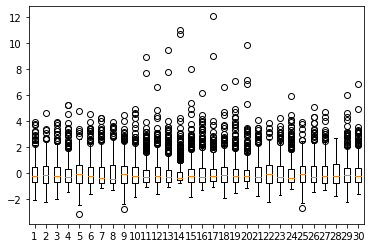

In [5]:
# Por ultimo se muestra un Box Plot que nos permita analizar la estructura de los datos estandarizados
plt.boxplot(z)
plt.show()